In [1]:
words = open("names.txt",'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [13]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0)+1
        #print(ch1,ch2)

In [14]:
b

{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [17]:

sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [18]:
import torch

In [29]:
N = torch.zeros((27,27),dtype=torch.int32)


In [61]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0


In [62]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [63]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1
        #print(ch1,ch2)

In [64]:
N

tensor([[ 1112,  5492,  2246,  3626,  3074,  1799,   753,  5333,  4174,   941,
          3558,  8019,  4840, 13414,  1272,   558,   635,  6620,  3875,  3429,
          2070,  1746,   698,   671,  4234,  1405,  7569,  6640],
        [ 7282,   632,   543,   600,  2352,   692,   134,   250,  2766,  1652,
           175,   774,  2528,  1642,  5648,    63,    82,  1744,  3280,  1122,
           777,   381,   834,   161,   348,  2050,   549,   114],
        [ 1744,   321,   122,     3,  1167,   655,     4,  1328,   583,   223,
           633,   232,   103,     0,   764,   107,    22,   152,   852,    78,
            72,    45,     0,     6,   208,    91,    97,    97],
        [ 2703,   817,     6,   340,  2567,   561,    50,   238,  2012,   289,
             9,   436,   176,    62,   756,   380,     3,   859,   134,    13,
           219,    69,    46,     0,   637,   106,   520,   516],
        [ 1874,  1545,   307,   771,  2691,  1447,   255,   329,  1754,   784,
           365,  6499,  1

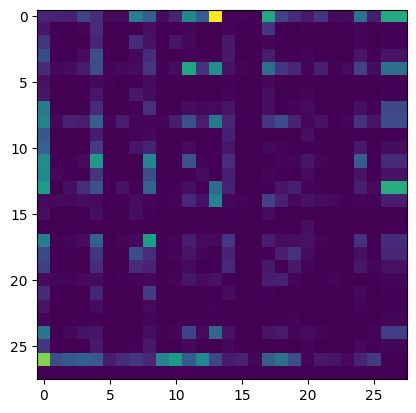

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [58]:
type(N[3,3])

torch.Tensor

In [59]:
type(N[3,3].item())

int

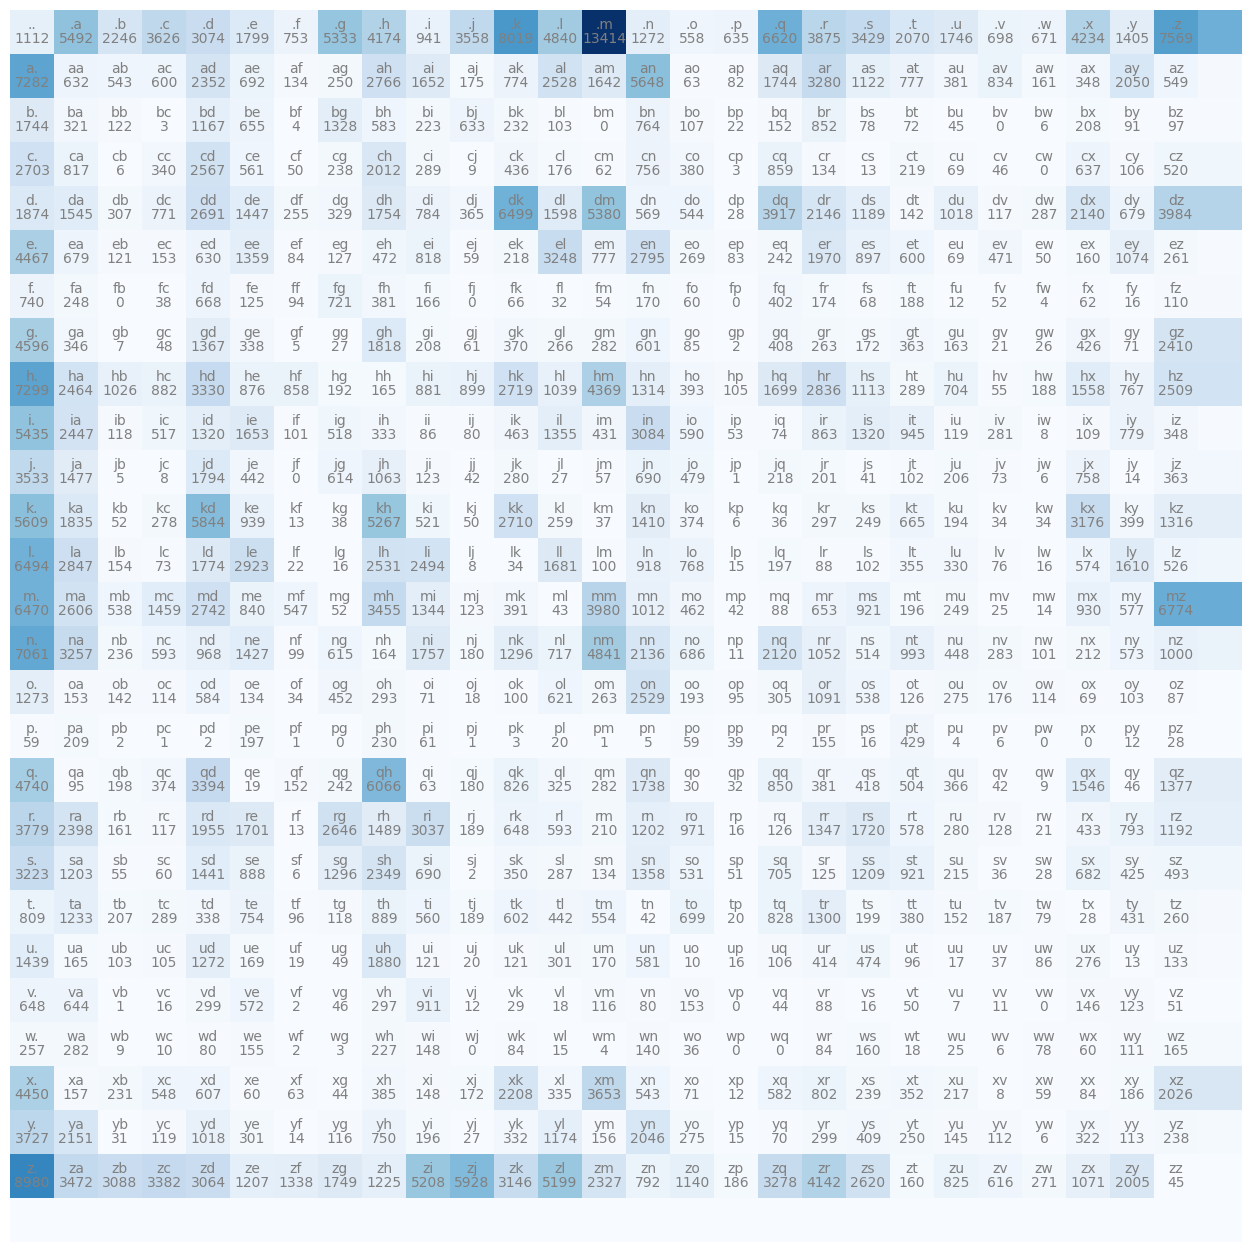

In [66]:
itos = {i : s for s,i in stoi.items()}
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha='center',va = 'bottom',color='gray')
        
        plt.text(j,i,N[i,j].item(),ha='center',va = 'top',color='gray')
plt.axis("off");

In [68]:
N[0]

tensor([ 1112,  5492,  2246,  3626,  3074,  1799,   753,  5333,  4174,   941,
         3558,  8019,  4840, 13414,  1272,   558,   635,  6620,  3875,  3429,
         2070,  1746,   698,   671,  4234,  1405,  7569,  6640],
       dtype=torch.int32)

In [70]:
p = N[0].float()
p = p/p.sum()
p 

tensor([0.0111, 0.0550, 0.0225, 0.0363, 0.0308, 0.0180, 0.0075, 0.0534, 0.0418,
        0.0094, 0.0357, 0.0803, 0.0485, 0.1344, 0.0127, 0.0056, 0.0064, 0.0663,
        0.0388, 0.0344, 0.0207, 0.0175, 0.0070, 0.0067, 0.0424, 0.0141, 0.0758,
        0.0665])